# WSI LAB 1 - Filip Ryniewicz
## Algorytm gradientu prostego
Zaimplementowałem algorytm gradientu prostego i przebadałem jego działanie na funkcjach:
$f(x) = \frac{x^{4}}{4}$, oraz\
$g(x) = 1.5 - exp(-x_{1}^{2}-x_{2}^{2}) - 0.5exp[-(x_{1}-1)^{2}-(x_{2}+2)^{2}]$

In [1]:
# Imports
from solver import MySolver
from functions import f, fGradient, g, gGradient
from plotting import initPlot, plot, barChart
import numpy as np
import matplotlib.pyplot as plt
import random

# Funkcja f(x)

## Wykres funkcji f(x)
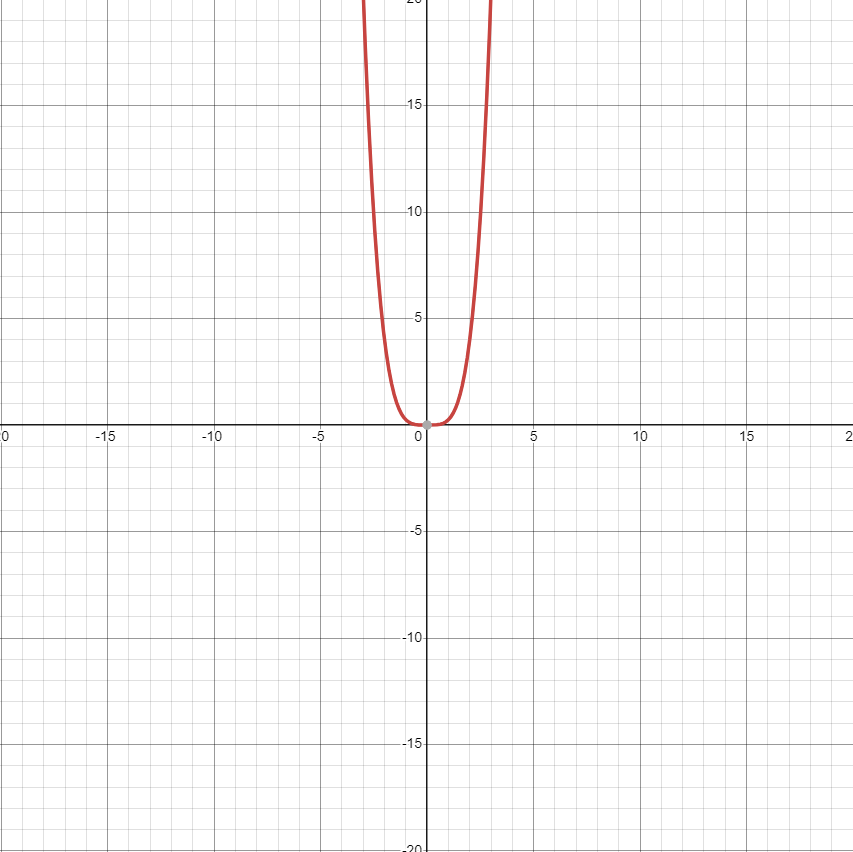



## Działanie algorytmu dla funkcji f(x)

In [7]:
s = MySolver(0.01) # initialize MySolver object with learning rate of 0.01
results = []

for i in range(5):
    x = np.array([random.randrange(-10, 10)], dtype = np.float64)
    output = s.solve(f, fGradient, x, finalStep=1e-10)  # run solve() to find the minimum of f(x)
    results.append(output[0])
    print(f'{i + 1}. For x0 = {x} found x: {output[0]}')

print(f'\nAVERAGE: {np.average(results)}\nSTANDARD DEVIATION: {np.std(results)}')


1. For x0 = [-1.] found x: [-0.04641422]
2. For x0 = [5.] found x: [0.04641458]
3. For x0 = [0.] found x: [0.]
4. For x0 = [3.] found x: [0.04641496]
5. For x0 = [-2.] found x: [-0.04641466]

AVERAGE: 1.3257897434476583e-07
STANDARD DEVIATION: 0.041514486571529764


Za każdym razem znalezione optimum było dla x = ~0, więc można założyć że minimum lokalne wynosi 0. \
Mały błąd wynika z tego że moja implementacja algorytmu zakańcza działaniem, 
gdy różnica wartości funkcji dla kolejnych znalezionych x różni się o mniej niż finalStep, 
które w tym przypadku ustawiłem na 1e-10.

## Wpływ parametru finalStep na ilość iteracji algorytmu oraz dokładność

In [3]:
s = MySolver(0.01) # initialize MySolver object with learning rate of 0.01

for count, FinalStep in enumerate([1e-5, 1e-10, 1e-15]):
    x = np.array([5], dtype = np.float64)
    output = s.solve(f, fGradient, x, finalStep=FinalStep)  # run solve() to find the minimum of f(x)
    print(f'{count + 1}. With finalStep = {FinalStep} found x: {output[0]} in {output[1]} steps')

1. With finalStep = 1e-05 found x: [0.31579492] in 495 steps
2. With finalStep = 1e-10 found x: [0.04641458] in 23200 steps
3. With finalStep = 1e-15 found x: [0.02235952] in 100001 steps


Jak można było się spodziewać zmniejszenie parametru finalStep wpływa na zwiększenie ilości iteracji, ale za to uzyskany wynik jest dokładniejszy.

## Wpływ learning rate na działanie algorytmu

Na poniższym wykresie pokazałem jak zmienia się wartość funkcji f(x) dla kolejnych x znalezionych przez algorytm. \
Dla uproszczenia ograniczyłem ilość iteracji do 10. Dla wszystkich learning rates jest ten sam punkt startowy x0 = 5.

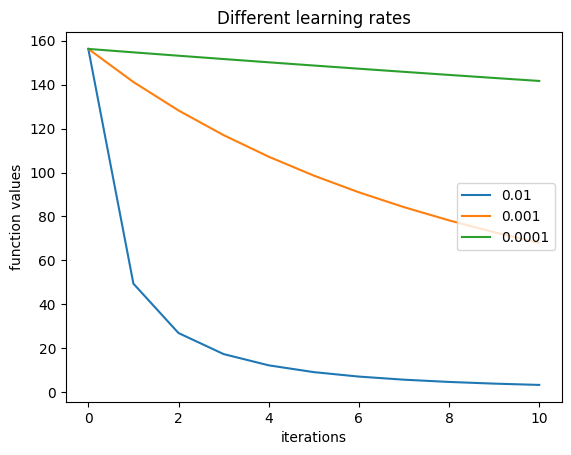

In [3]:
initPlot('Different learning rates', 'function values', 'iterations')
for rate in [0.01, 0.001, 0.0001]:
    plot(rate, f, fGradient, np.array([5]))

plt.legend(loc='right')
plt.show()

Wszystkie te wykresy dążą do zera, co pokazuje że algorytm prawidłowo szuka minimum. Dla mniejszych learning rates dąży zdecydowanie wolniej niż dla większych. 

Przy odpowiednio dużym learning rate, kolejne znajdowane x są coraz dalej od szukanego minimum. Jako, że badana funkcja rośnie bardzo szybko (x^4), wartości funkcji robią się na tyle duże, że python wyrzuca MathError przy większym limicie iteracji. Na kolejnym wykresie przedstawiam zjawisko algorytmu oddalającego się od szukanego minimum.

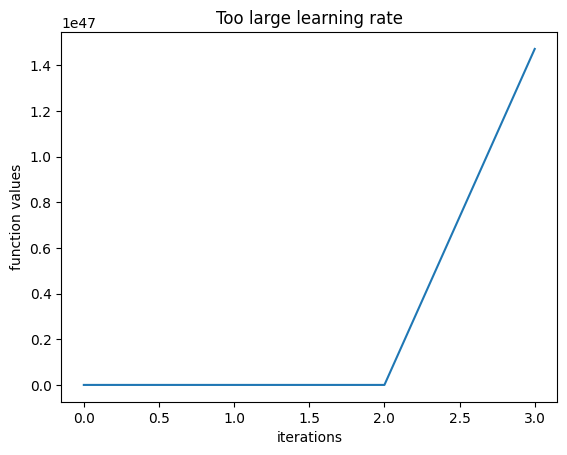

In [3]:
initPlot('Too large learning rate', 'function values', 'iterations')
plot(9, f, fGradient, np.array([1], dtype=np.float64), steps=3)

plt.show()

## Wpływ learning rate na ilość iteracji

 For x0 = [5.] found x: [0.14672533] in 2315 iterations with learning rate 0.01.
 For x0 = [5.] found x: [0.21542788] in 10749 iterations with learning rate 0.001.
 For x0 = [5.] found x: [0.31622415] in 49797 iterations with learning rate 0.0001.




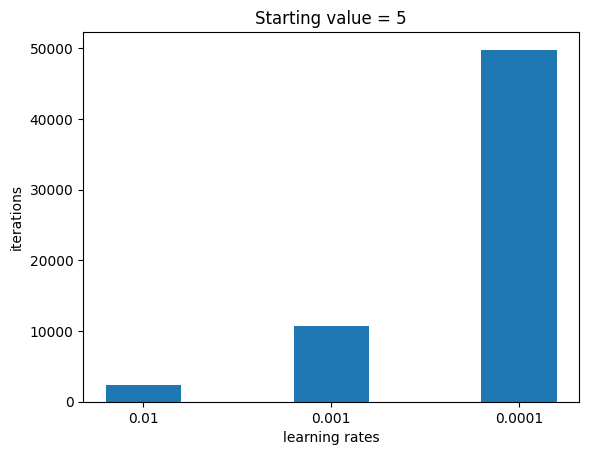

 For x0 = [10.] found x: [0.] in 2 iterations with learning rate 0.01.
 For x0 = [10.] found x: [0.21542694] in 10763 iterations with learning rate 0.001.
 For x0 = [10.] found x: [0.31622401] in 49946 iterations with learning rate 0.0001.




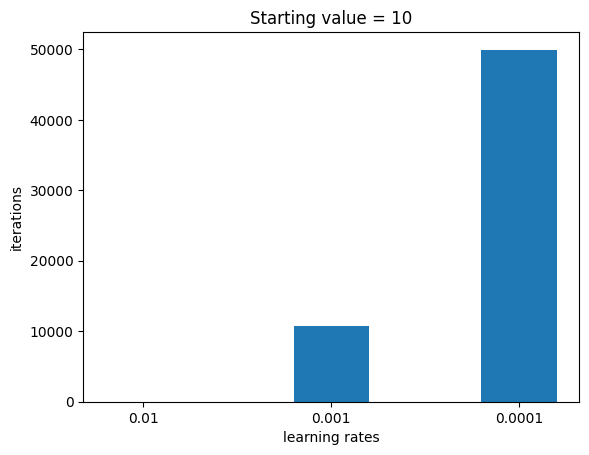

In [3]:
s = MySolver(0.01)
rates = [0.01, 0.001, 0.0001]

for xValue in [5, 10]:
    iterations = []
    for rate in rates:
        s.learningRate = rate
        x = np.array([xValue], dtype=np.float64)
        output = s.solve(f, fGradient, x, finalStep=1e-7)
        iterations.append(output[1])
        print(f' For x0 = {x} found x: {output[0]} in {output[1]} iterations with learning rate {rate}.')

    print('\n')
    barChart(rates, iterations, f'Starting value = {xValue}', 'iterations', 'learning rates')
    plt.show()

Jak widać z outputu poprzedniej komórki kodu, zmniejszenie learning rate algorytmu powoduje zwiększenie ilości iteracji potrzebnych do znalezienia minimum.

# Funkcja g(x)

## Wykres funkcji g(x) 
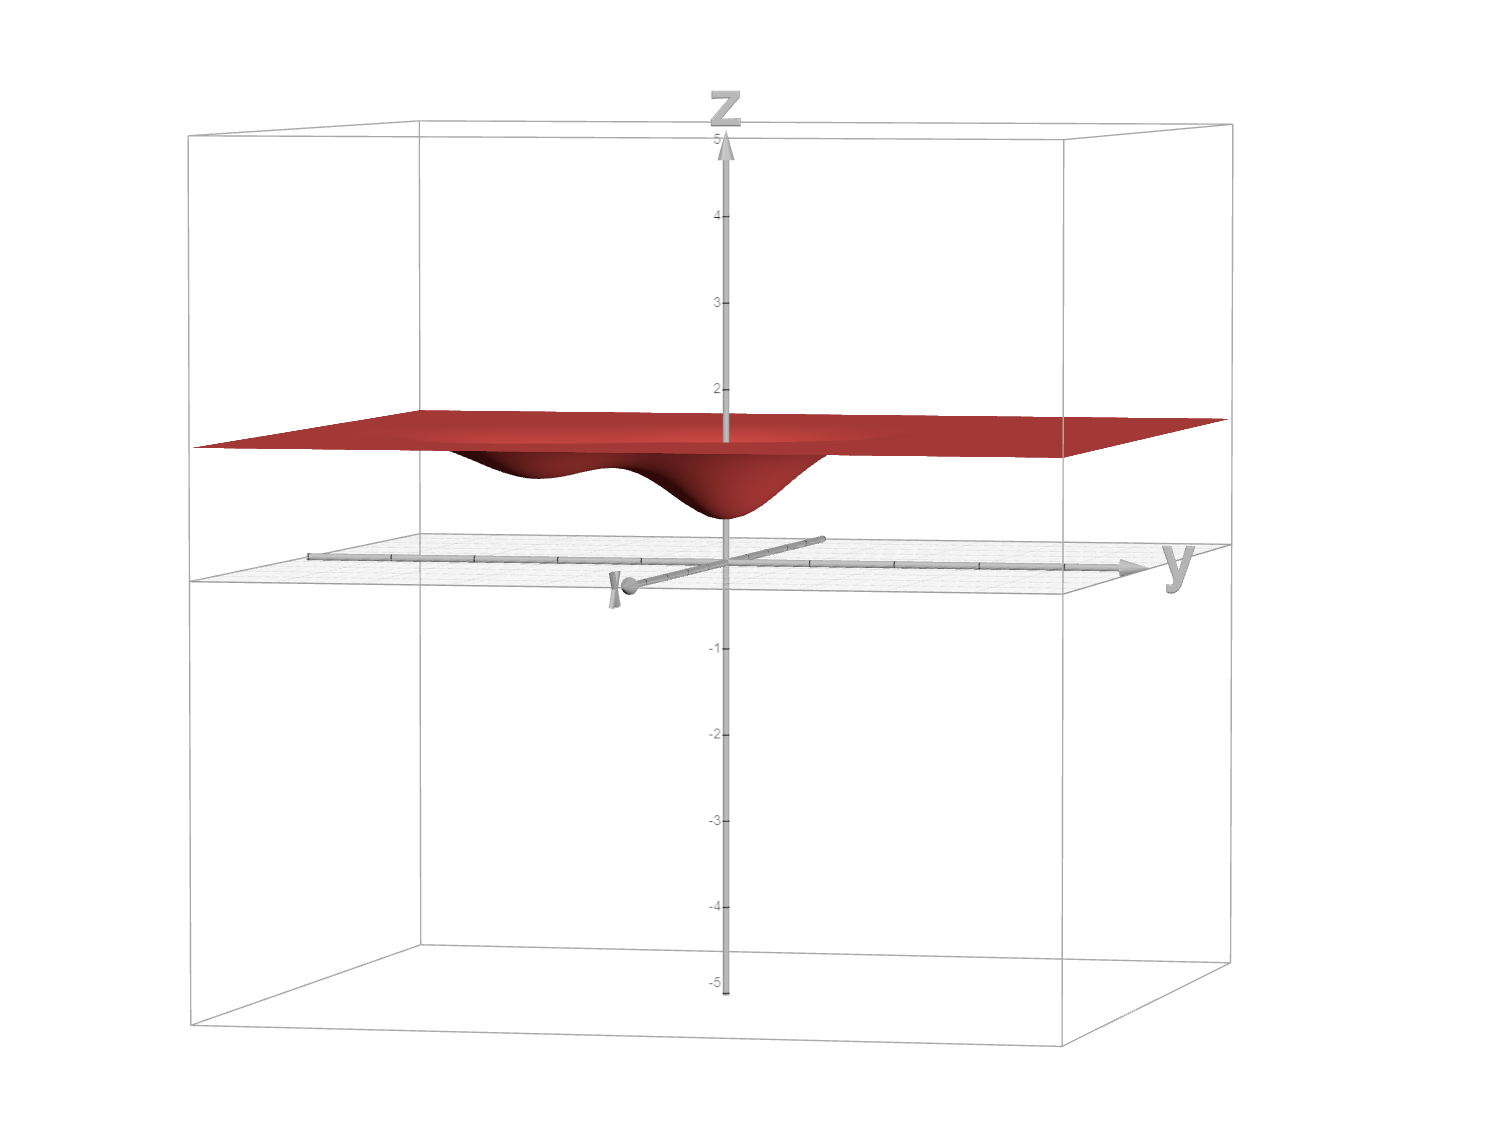
Funkcja g(x) w większości swojej dziedziny jest płaska, ale ma jedno minimum lokalne i 1 globalne. Zakładam, że w zależności od wybranych parametrów, algorytm zakończy swoje działanie w jednym z tych minimów, nie zawsze globalnym.

### Działanie algorytmu gradientu na funkcji g(x)

In [14]:
s = MySolver(0.1)

for i in range(5):
    x = np.array([random.randrange(-5, 5), random.randrange(-5, 5)], dtype=np.float64)
    s.solve(g, gGradient, x, finalStep=1e-30, stepLimit=1e30)
    print(f'{i+1}. For x0 = {x} found x: {s.previousResult}')

1. For x0 = [ 0. -1.] found x: [ 0.00347602 -0.00695203]
2. For x0 = [3. 2.] found x: [ 0.00347602 -0.00695202]
3. For x0 = [-1.  2.] found x: [ 0.00347601 -0.00695203]
4. For x0 = [ 4. -1.] found x: [ 0.98451009 -1.96902015]
5. For x0 = [ 4. -1.] found x: [ 0.98451009 -1.96902015]


Minima tej funkcji to (0, 0) oraz (1, -2). Jeśli punkt startowy x0 jest od nich zbyt oddalony, to funkcja g(x) jest prawie idealnie płaska, więc gradient obliczony w tym punkcie jest prawie zerowy. Przez to algorytm kończy swoje działanie w punkcie początkowym i nie znajduje właściwych minimów. W pozostałych przypadków algorytm trafia do jednego z dwóch minimów. Przez to nie ma sensu liczyć średniej z współrzędnych z minimum, ponieważ otrzymana wartość znalazłaby się między dwoma minimami.

## Porównanie różnych learning rate dla g(x)

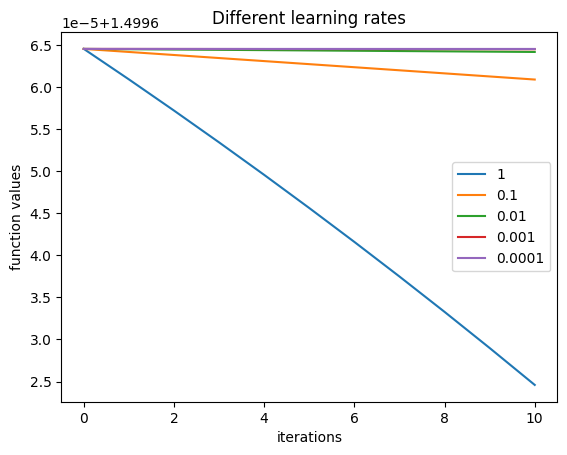

In [15]:
initPlot('Different learning rates', 'function values', 'iterations')
for rate in [1, 0.1, 0.01, 0.001, 0.0001]:
    plot(rate, g, gGradient, np.array([2, 2]), steps=10, FinalStep=1e-10)

plt.legend(loc='right')
plt.show()

Jak widać na powyższym wykresie, dla większych wartości learning rate, wartości funkcji szybciej zbliżają się do wartości minium.